In [80]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import linkage, dendrogram

In [81]:
small_data = pd.read_csv("Data/BAL/TestBALData.tsv", sep = '\t', usecols=range(2,6)).T
total_data = pd.read_csv("Data/BAL/normdataBAL0715.txt", sep = '\t', usecols=range(2,6)).T
filtered_data = pd.read_csv("filtered_data_BAL.csv", sep = ',').T
sample_data = (datasets.load_iris()).data #default data set from sklearn for testing

data = filtered_data
clusterNum = 4

# SciKit Implementation:

In [82]:
def SKheirarichalClustering(data, clusterNum):
    clusters = AgglomerativeClustering(n_clusters=clusterNum, linkage='average')
    clusterLabels = clusters.fit(data).labels_
    return clusters, clusterLabels

In [83]:
SKclusters, SKclusterLabels = SKheirarichalClustering(data, clusterNum)

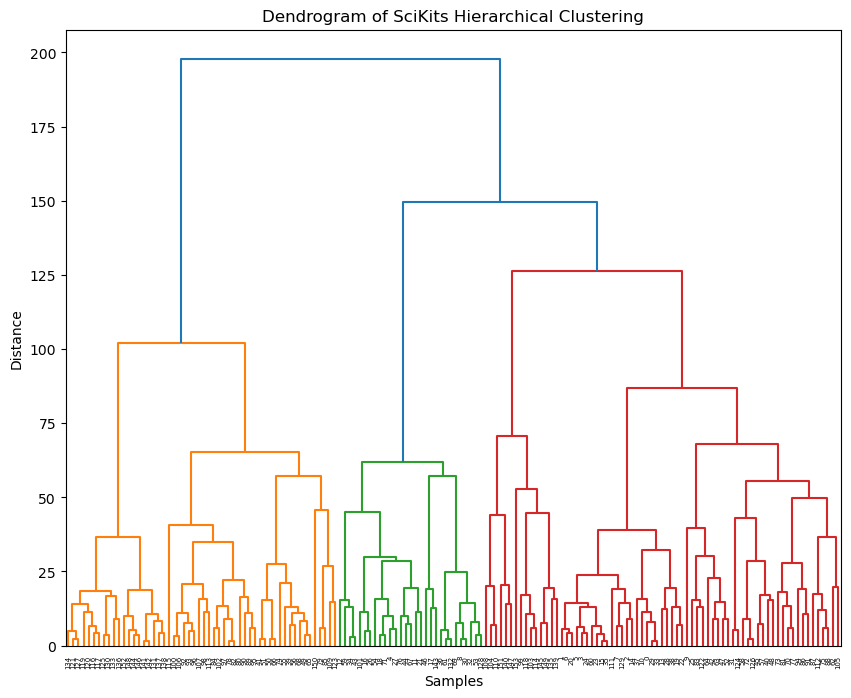

In [84]:
SKclusters.fit(data)
Z = linkage(SKclusters.children_, method='average')
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram of SciKits Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Our Implementation:

In [85]:
def euclideanDistance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

def distanceMatrix (data):
    n = data.shape[0]
    distMatrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distMatrix[i,j] = euclideanDistance(data[i], data[j])
            distMatrix[j,i] = distMatrix[i,j]
    return distMatrix

def heirarichalClustering (data, clusterNum):
    # Number of samples
    n = data.shape[0]
    # Creates distance matrix
    dist_matrix = distanceMatrix(data)
    # print(dist_matrix)
    # Places each data point into it's own cluster
    clusters = [[i] for i in range(n)]
    # Repeats until you have reduced from #sample clusters to #specified clusters
    while len(clusters) > clusterNum:
        # Finds closest clusters
        min = 1000000
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = np.mean([dist_matrix[a,b] for a in clusters[i] for b in clusters[j]])
                if dist < min:
                    min = dist
                    merged = (i, j)

        # Merge the two closest clusters
        clusters[merged[0]] += clusters[merged[1]]
        del clusters[merged[1]]
    return clusters

In [87]:
clusters = heirarichalClustering(data, clusterNum)
distMatrix = distanceMatrix(data)

/var/folders/48/58h9_x896ts52nyqt295ln440000gn/T/ipykernel_14445/1509063238.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distMatrix, method='average')


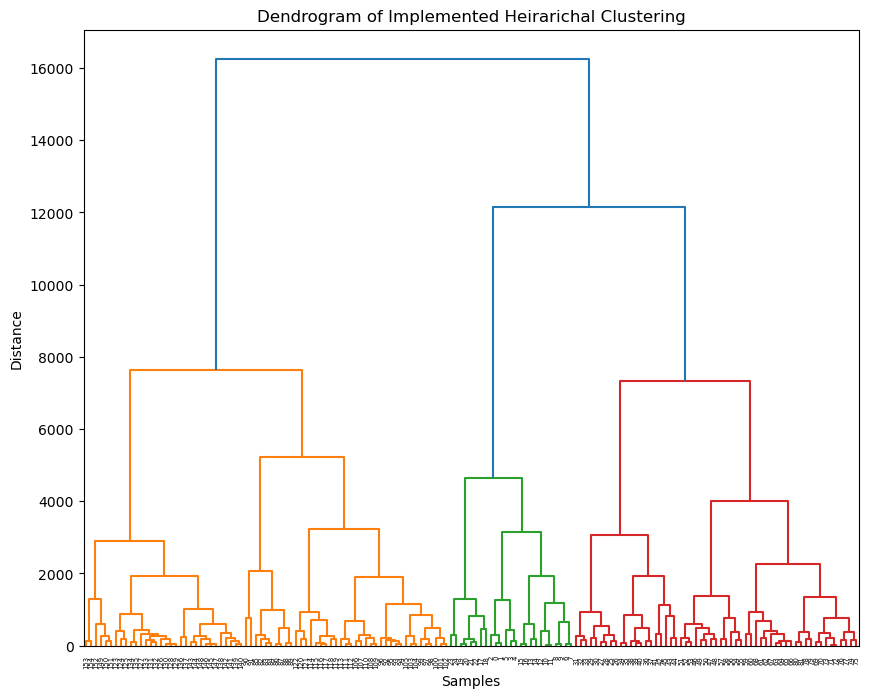

In [88]:
Z = linkage(distMatrix, method='average')
# Z = myLinkage(data)
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram of Implemented Heirarichal Clustering')
plt.show()